In [1]:
import numpy as np
import matplotlib.pyplot as plt
import editdistance as ed

In [5]:
import pickle

In [6]:
def find_closest(d, init_item, t):
    min_ed = t
    answ_item = [-1, -1]
    for comp_item in d.items():
        dist = ed.eval(init_item, comp_item[0])
        if dist < min_ed:
            min_ed = dist
            answ_item = comp_item

    return min_ed, answ_item

In [7]:
def plot_gr(gr, start=0, end=-1, log = False, all_ticks = False,  s=10):
    plt.figure(figsize=(s,s))
    if end == -1:
        end = gr.shape[0]
    if log:
        plt.imshow(np.log(gr[start:end,start:end] + 1))
    else:
        plt.imshow(gr[start:end,start:end])
    plt.colorbar()
    if all_ticks: 
        plt.xticks(np.arange(start,end))
        plt.yticks(np.arange(start,end))
    plt.show()

In [19]:
graph = np.load("../data/graphs/ES3_22.npy")[:34, :34]
sp_to_n = pickle.load(open("../data/dicts/ES3_cl_to_n", 'rb'))
nd = pickle.load(open("../data/dicts/ES3_nd", 'rb'))

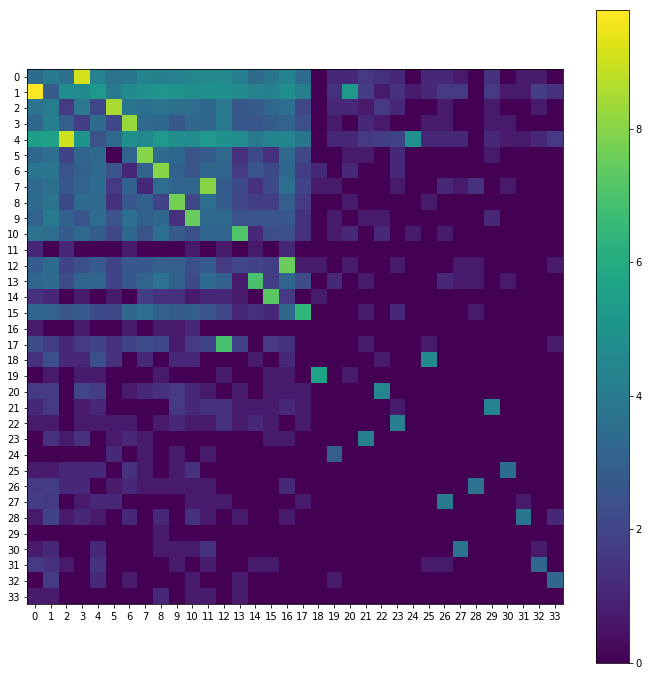

In [30]:
plot_gr(graph,s=12, log = True, all_ticks=1)

In [28]:
graph.sum(1).astype(int)# + graph.sum(0).astype(int)

array([10275, 19554,  5491,  4214, 10752,  3242,  3339,  3377,  2543,
        2156,  1485,    10,  2047,  1383,  1461,   875,     7,  1097,
         142,   297,   123,   105,    88,    82,    23,    46,    61,
          71,    65,     1,    54,    41,    34,     7])

In [22]:
for k in nd.keys():
    print(sp_to_n[k], nd[k])

0 28374
1 20414
2 14353
3 13974
4 11315
5 8389
6 7672
7 6864
8 6274
9 4979
10 3798
11 3740
12 3707
13 2920
14 2764
15 2611
16 2390
17 1913
18 436
19 331
20 329
21 195
22 192
23 173
24 163
25 158
26 129
27 123
28 109
29 92
30 89
31 87
32 68
33 56
34 17
35 5
36 3
37 2
38 2
39 2
40 2
41 1
42 1
43 2
44 1
45 2
46 1
47 1
48 1
49 1
50 1
51 1
52 4
53 1
54 1
55 1
56 1
57 1
58 1
59 2
60 1
61 3
62 1
63 1
64 1
65 1
66 1
67 2
68 1
69 1
70 1
71 1


## experiments

In [25]:
m = np.zeros((10, 10))
for i in range(9):
    m[i, i+ 1] = 1
    
m_n = m + np.random.normal(0, 0.1, (10,10))

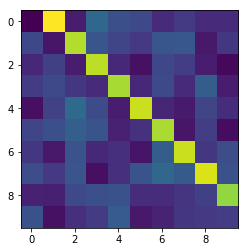

In [26]:
plt.imshow(m_n)
plt.show()

In [29]:
q,r = np.linalg.linalg.qr(m_n)

In [34]:
s,v,d = np.linalg.svd(m_n)

In [40]:
v

array([1.40002838, 1.21770283, 1.20267082, 1.12811247, 0.9927785 ,
       0.94569628, 0.87048748, 0.76749815, 0.57730214, 0.05763834])

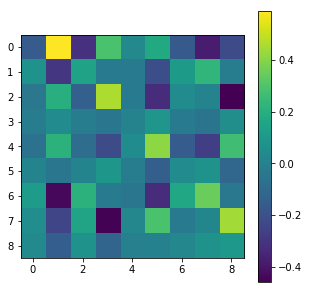

In [49]:
t = 2
plot_gr(np.dot(np.dot(s[:, :t], np.diag(v[:t])), d[:t]), s = 5)

In [51]:
from sklearn.decomposition import PCA

In [56]:
pca = PCA(2)

In [57]:
pca.fit_transform(m_n)

array([[ 0.93126452,  0.19277007],
       [-0.3396527 , -0.2558127 ],
       [ 0.55420556, -0.57594991],
       [ 0.04650989,  0.13291396],
       [ 0.15472362,  0.68472973],
       [ 0.04751806, -0.18870357],
       [-0.53123229, -0.45969987],
       [-0.54082397,  0.55159359],
       [-0.23974804,  0.0193495 ],
       [-0.08276464, -0.1011908 ]])

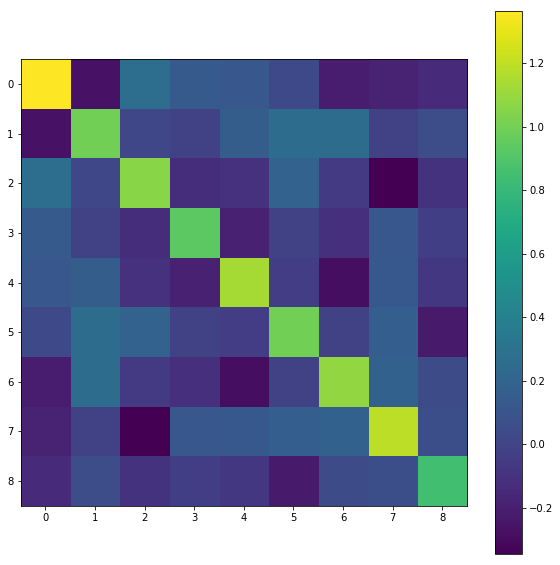

In [61]:
plot_gr(np.dot(m_n, m_n.T))

In [96]:
gr6_n = graph[:6,:6]# / graph[:6,:6].sum(0)

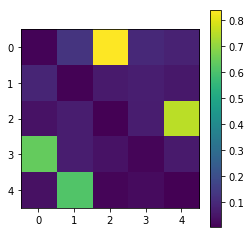

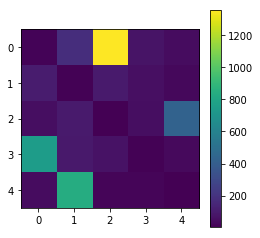

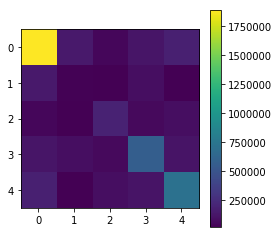

In [97]:
plot_gr(graph[:6,:6] / graph[:6,:6].sum(0), s = 4)
plot_gr(graph[:6,:6], s = 4)
plot_gr(np.dot(gr6_n, gr6_n.T), s =4)

In [6]:
gr_ES = np.load("../data/graphs/ES3_22.npy")[:34, :34]

In [7]:
plot_gr(np.dot(norm_graph(gr_ES), norm_graph(gr_ES.T)),all_ticks=True )

NameError: name 'norm_graph' is not defined

In [8]:
plot_gr((norm_graph(gr_ES)), all_ticks=1)

NameError: name 'norm_graph' is not defined

In [13]:
def norm_graph(gr, strat='sum'):
    if strat == 'sum':
        div = np.max(np.vstack((np.ones(gr.shape[0]), gr.sum(1))), axis = 0)
    elif strat == 'max':
        div = np.max(np.vstack((np.ones(gr.shape[0]), gr.max(1))), axis = 0)
    else:
        raise ValueError("322")
    return gr / div.reshape(-1,1)

In [167]:
norm_graph(gr_ES)

array([[3.01703163e-03, 5.64476886e-03, 3.50364964e-03, ...,
        9.73236010e-05, 9.73236010e-05, 0.00000000e+00],
       [8.92656234e-01, 8.69387338e-04, 6.08571136e-03, ...,
        5.11404316e-05, 2.55702158e-04, 1.53421295e-04],
       [7.64887999e-03, 1.12912038e-02, 7.28464761e-04, ...,
        0.00000000e+00, 1.82116190e-04, 0.00000000e+00],
       ...,
       [9.75609756e-02, 7.31707317e-02, 2.43902439e-02, ...,
        0.00000000e+00, 5.85365854e-01, 0.00000000e+00],
       [0.00000000e+00, 1.17647059e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.05882353e-01],
       [1.42857143e-01, 1.42857143e-01, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

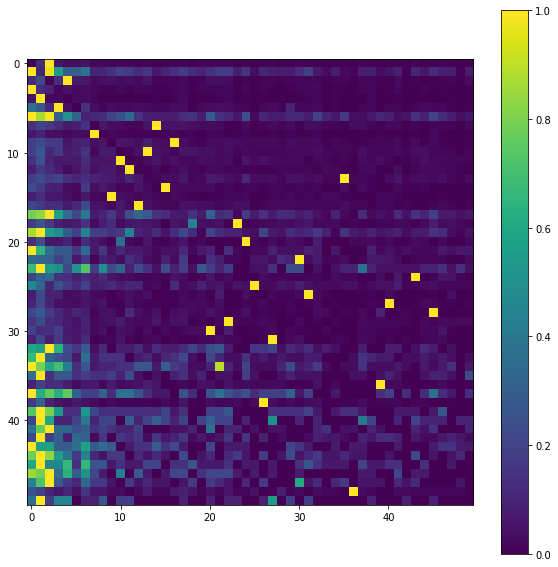

In [185]:
plot_gr(norm_graph(graph[:50, :50], 'max'))

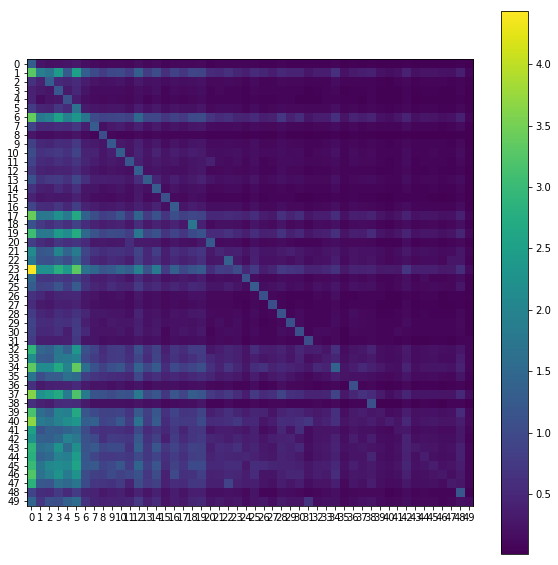

In [186]:
plot_gr(np.dot(norm_graph(graph[:50, :50], 'max'), norm_graph(graph[:50, :50].T, 'max')), all_ticks=1)

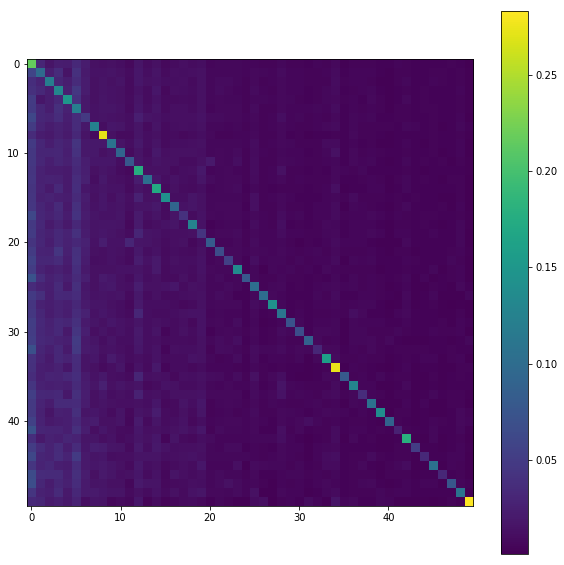

In [175]:
plot_gr(np.dot(norm_graph(graph[:, :]), norm_graph(graph[:, :].T)), start = 0, end=50)

In [132]:
np.max(np.vstack((np.ones(3), np.zeros(3))), axis = 0)

array([1., 1., 1.])

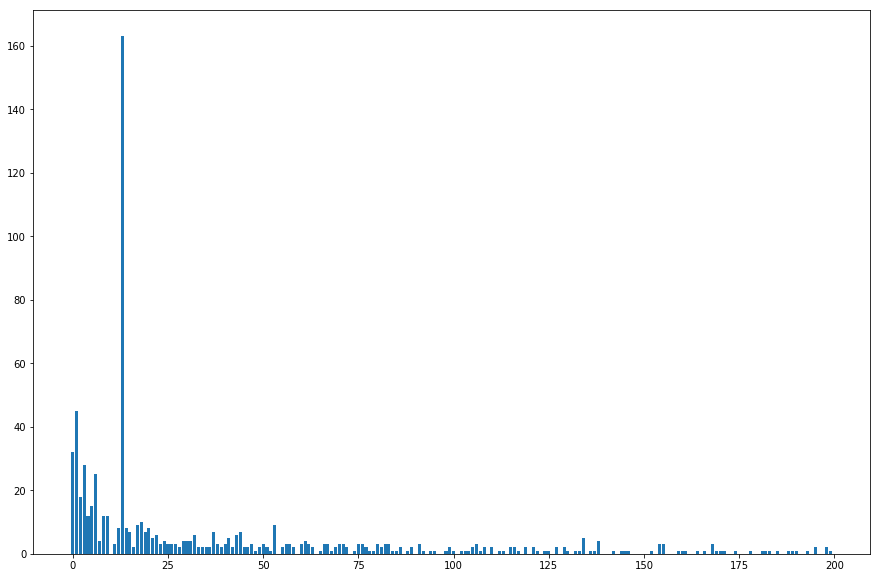

In [195]:
plt.figure(figsize = (15,10))
plt.bar(np.arange(200), graph[10][:200])

plt.show()

In [196]:
gr_ES

array([[3.1000e+01, 5.8000e+01, 3.6000e+01, ..., 1.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.7455e+04, 1.7000e+01, 1.1900e+02, ..., 1.0000e+00, 5.0000e+00,
        3.0000e+00],
       [4.2000e+01, 6.2000e+01, 4.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [4.0000e+00, 3.0000e+00, 1.0000e+00, ..., 0.0000e+00, 2.4000e+01,
        0.0000e+00],
       [0.0000e+00, 4.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.4000e+01],
       [1.0000e+00, 1.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [198]:
from scipy.stats import kstest

In [233]:
kstest(gr_ES[0][5:], ln_gen)

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [212]:
from scipy.stats.distributions import lognorm

In [239]:
def ln_gen(size):
    return lognorm.rvs(s = 0.01, size = size)

In [240]:
ln_gen(10)

array([1.00469925, 1.00560295, 1.00367111, 0.98079923, 1.00694046,
       1.00174699, 0.99708096, 1.01136668, 1.01359161, 0.99467077])